In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier as MLPClassifier_sk

In [4]:
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=647)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=647)

In [6]:
np.average(y_test)

0.49

In [7]:
from algosfromscratch.deep_learning import MLPClassifier

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,20,), hidden_activation='relu', out_activation='sigmoid',
                    learning_rate=0.001, max_iter=10000, loss_function='cross-entropy', random_state=647)

In [9]:
clf.fit(X_train, y_train, verbose=False)

+---------------+
| Model Summary |
+---------------+
+---------------------+-------------+-----------------+----------------+------------+
| Layer Name          | Layer Type  | Shape - Weights | Shape - Biases | Parameters |
+---------------------+-------------+-----------------+----------------+------------+
| input_layer         | LinearLayer | (5, 100)        | (1, 100)       | 600        |
| input_activation    | Activation  | None            | None           | 0          |
| hidden_layer_1      | LinearLayer | (100, 50)       | (1, 50)        | 5050       |
| hidden_activation_1 | Activation  | None            | None           | 0          |
| hidden_layer_2      | LinearLayer | (50, 20)        | (1, 20)        | 1020       |
| hidden_activation_2 | Activation  | None            | None           | 0          |
| output_layer        | LinearLayer | (20, 1)         | (1, 1)         | 21         |
| output_activation   | Activation  | None            | None           | 0          |


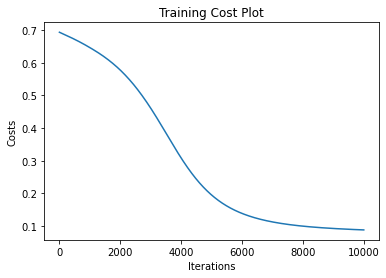

In [10]:
clf.plot_training_costs()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.97

In [26]:
clf_sk = MLPClassifier_sk(hidden_layer_sizes=(100,50,20,), activation='relu',
          learning_rate_init=0.001, max_iter=10000, random_state=647)

In [27]:
clf_sk.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=10000,
              random_state=647)

In [28]:
y_pred_sk = clf_sk.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_sk)

0.97

In [30]:
np.sum(y_pred == y_pred_sk)

294

In [31]:
np.sum(y_pred != y_pred_sk)

6

# Titanic

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('../data/titanic.csv')

In [34]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [35]:
X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']].to_numpy()

# Make female 1 and male 0
X[:,1] = [0 if s == 'female' else 1 for s in X[:,1]]

In [36]:
y = df['Survived'].to_numpy()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [40]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,20,), hidden_activation='relu', out_activation='softmax',
                    learning_rate=0.001, max_iter=2000, loss_function='cross-entropy', random_state=647)

In [43]:
y_train

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In [41]:
clf.fit(X_train, y_train)

+---------------+
| Model Summary |
+---------------+
+---------------------+-------------+-----------------+----------------+------------+
| Layer Name          | Layer Type  | Shape - Weights | Shape - Biases | Parameters |
+---------------------+-------------+-----------------+----------------+------------+
| input_layer         | LinearLayer | (6, 100)        | (1, 100)       | 700        |
| input_activation    | Activation  | None            | None           | 0          |
| hidden_layer_1      | LinearLayer | (100, 50)       | (1, 50)        | 5050       |
| hidden_activation_1 | Activation  | None            | None           | 0          |
| hidden_layer_2      | LinearLayer | (50, 20)        | (1, 20)        | 1020       |
| hidden_activation_2 | Activation  | None            | None           | 0          |
| output_layer        | LinearLayer | (20, 1)         | (1, 1)         | 21         |
| output_activation   | Activation  | None            | None           | 0          |


TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [45]:
y_pred = clf.predict(X_test)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [46]:
clf_sk = MLPClassifier_sk(hidden_layer_sizes=(100,50,20,), activation='relu',
          learning_rate_init=0.001, max_iter=10000, random_state=647)

In [47]:
clf_sk.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=10000,
              random_state=647)

In [48]:
y_pred_sk = clf_sk.predict(X_test)

In [49]:
y_pred == y_pred_sk

<ipython-input-49-26b5a3b4df9f>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_pred == y_pred_sk


False

In [50]:
accuracy_score(y_pred, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [300, 444]

In [51]:
accuracy_score(y_pred_sk, y_test)

0.8265765765765766